### Links
- [SentenceTransformers](https://www.sbert.net/)
- [UMAP](https://umap-learn.readthedocs.io/en/latest)
- [Plotting UMAP results](https://umap-learn.readthedocs.io/en/latest/plotting.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

from matplotlib import pyplot as plt
import seaborn  as sns

import numpy  as np
import pandas as pd
import torch

import logging
import random

import data  as dt
import model as ml
import util  as ut
import pytorch_common.util as pu

## Setup

In [3]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.__version__

'1.12.1+cu116'

In [6]:
pu.set_device_name('gpu')

logging.info(pu.get_device())

2022-08-28 15:32:11,811 - INFO - cuda:0


In [7]:
torch.cuda.get_arch_list()

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']

In [8]:
def set_seed(value):
    random.seed(value)
    np.random.seed(value)
    torch.manual_seed(value)

In [9]:
set_seed(42)

In [10]:
DATASET_PATH = '../datasets'

In [11]:
def plot_categories(groups):
    plt.figure(figsize=(15,7))
    ax = sns.barplot(x=groups['category'], y='title', data=groups)
    ax.set(xlabel=None)
    ax.set(xticklabels=[])
    plt.show()

## Preparar dataset

In [12]:
dataset = pd.read_csv(f'{DATASET_PATH}/ebay-all.csv')
dataset.head()

,title,category
0,Mrs Sinclair's Suitcase: 'A heart-breaking tal...,"eBay ~ Books, Comics & Magazines ~ Books"
1,Stone Mothers: The addictive new thriller from...,"eBay ~ Books, Comics & Magazines ~ Books"
2,Don't Close Your Eyes: The astonishing psychol...,"eBay ~ Books, Comics & Magazines ~ Books"
3,Regency Scandal: Dissolute Ways: The Runaway C...,"eBay ~ Books, Comics & Magazines ~ Books"
4,Gone Without A Trace: a gripping psychological...,"eBay ~ Books, Comics & Magazines ~ Books"


## Cantidad de productos por categoria

<Figure size 1080x504 with 1 Axes>

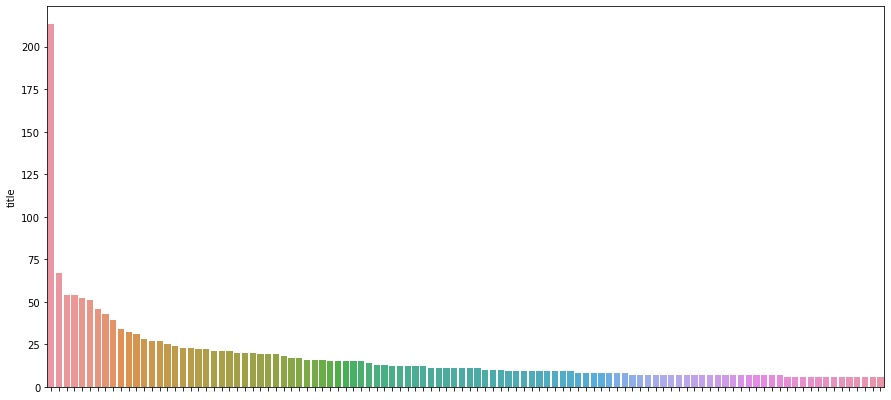

In [13]:
plot_categories(ut.group_by_count(dataset, ['category'], 'title'))

## Cluster de categorias

In [14]:
sentence_encoder = ml.SentenceEncoder('all-MiniLM-L6-v2')

2022-08-28 15:32:12,348 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-08-28 15:32:12,555 - INFO - Use pytorch device: cuda


Batches:   0%|          | 0/58 [00:00<?, ?it/s]

<model.umap.UMAP object at 0x7fc2b95d3370>

<Figure size 1500x1500 with 1 Axes>

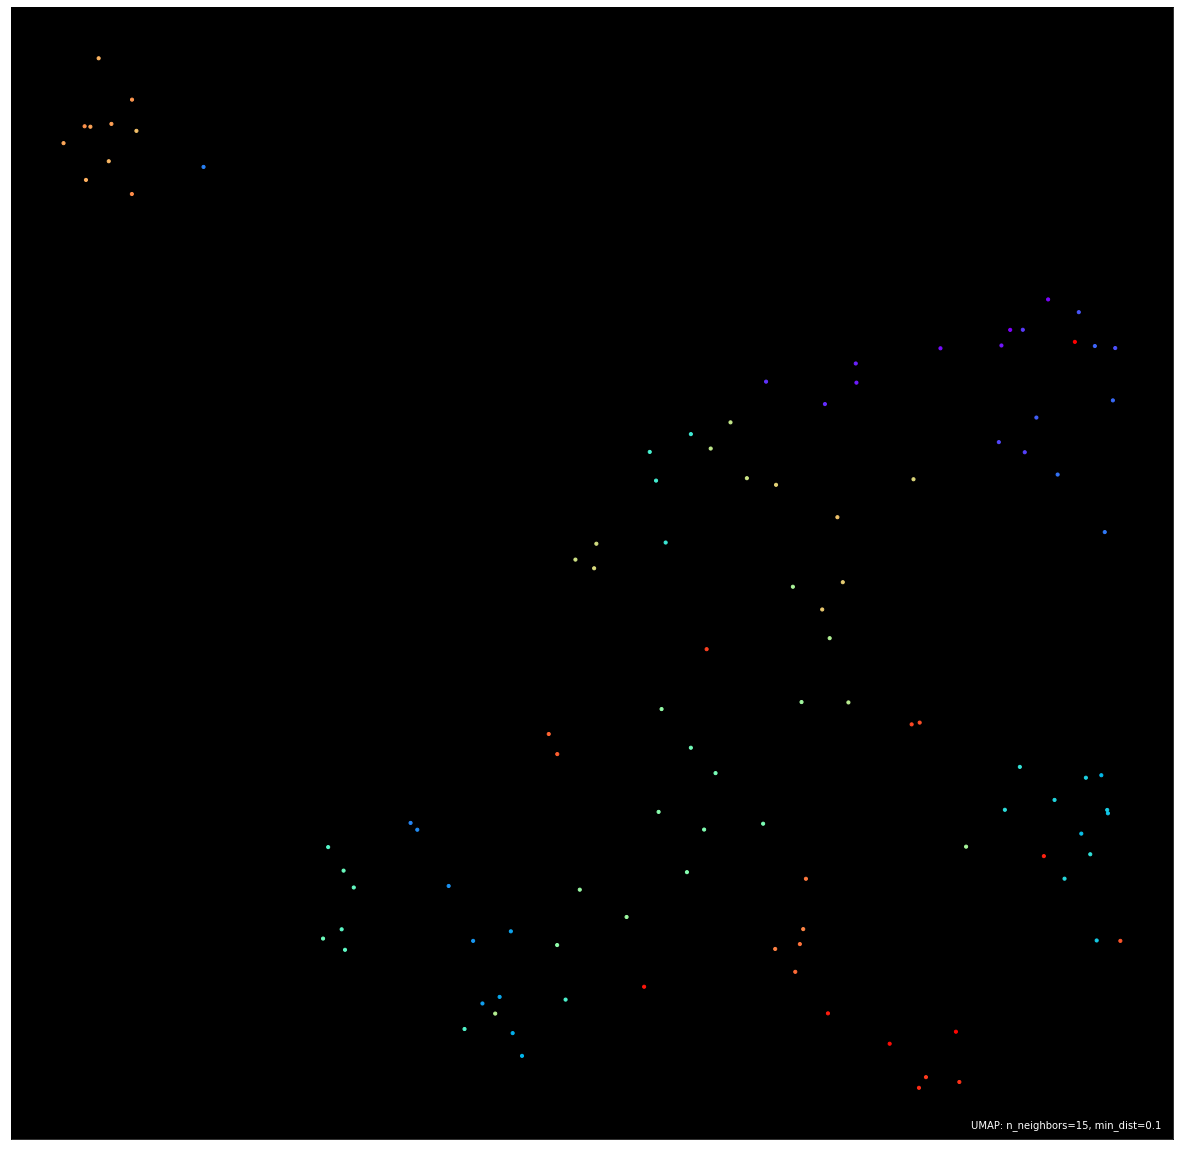

<Figure size 1500x1500 with 1 Axes>

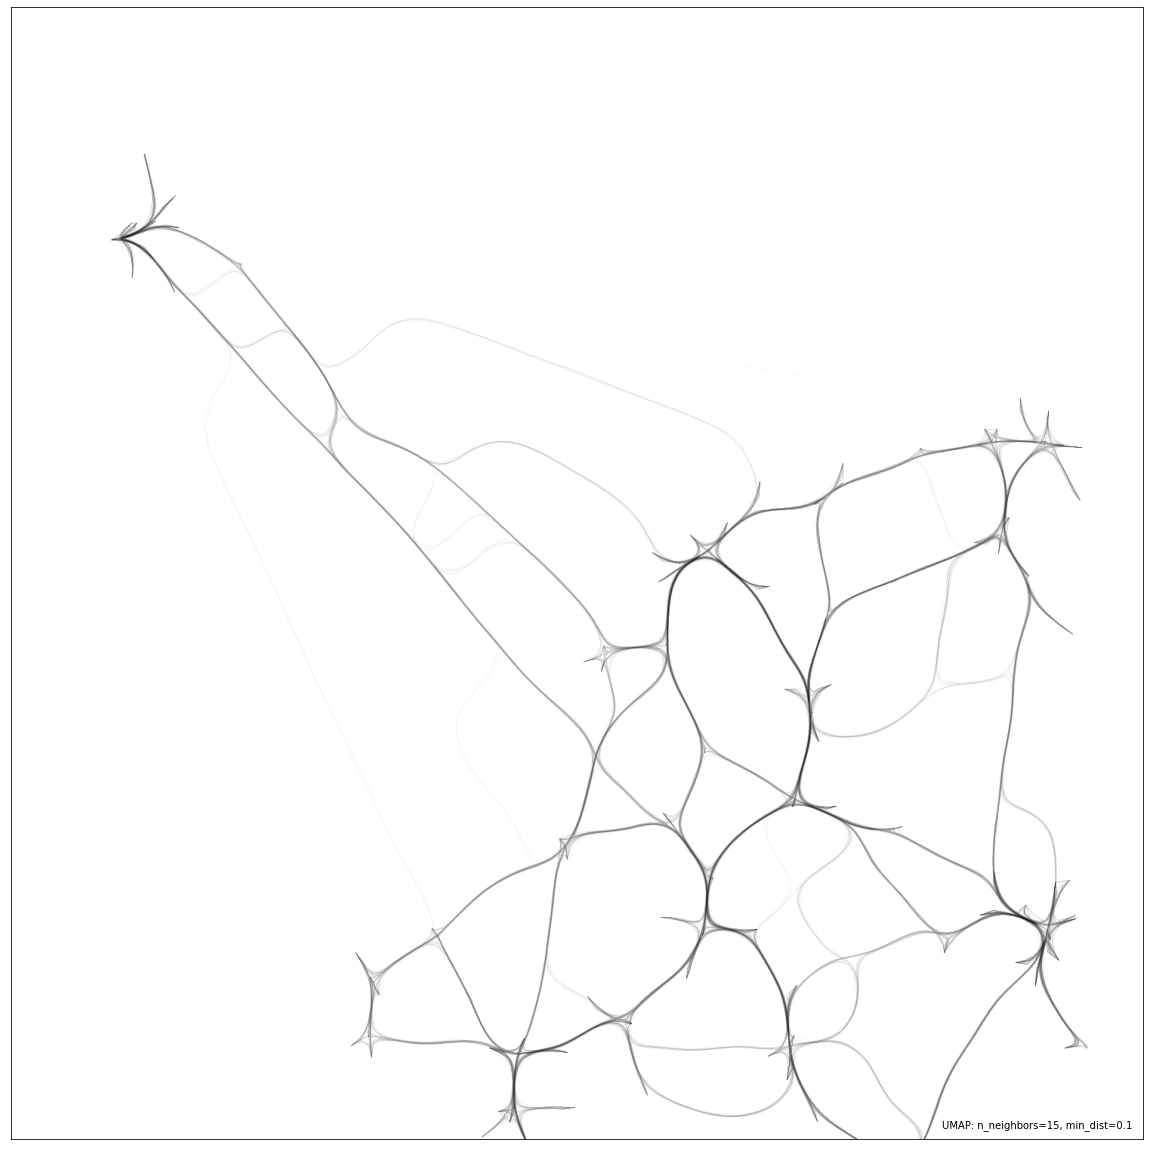

In [15]:
category_embeddindgs = sentence_encoder(dataset['category'])

ml.UMAP(category_embeddindgs) \
    .plot_clusters(labels=dataset['category']) \
    .plot_connectivity()

## Cluster de productos por similitud entre titulos

Batches:   0%|          | 0/58 [00:00<?, ?it/s]

<model.umap.UMAP object at 0x7fc26e15caf0>

<Figure size 1500x1500 with 1 Axes>

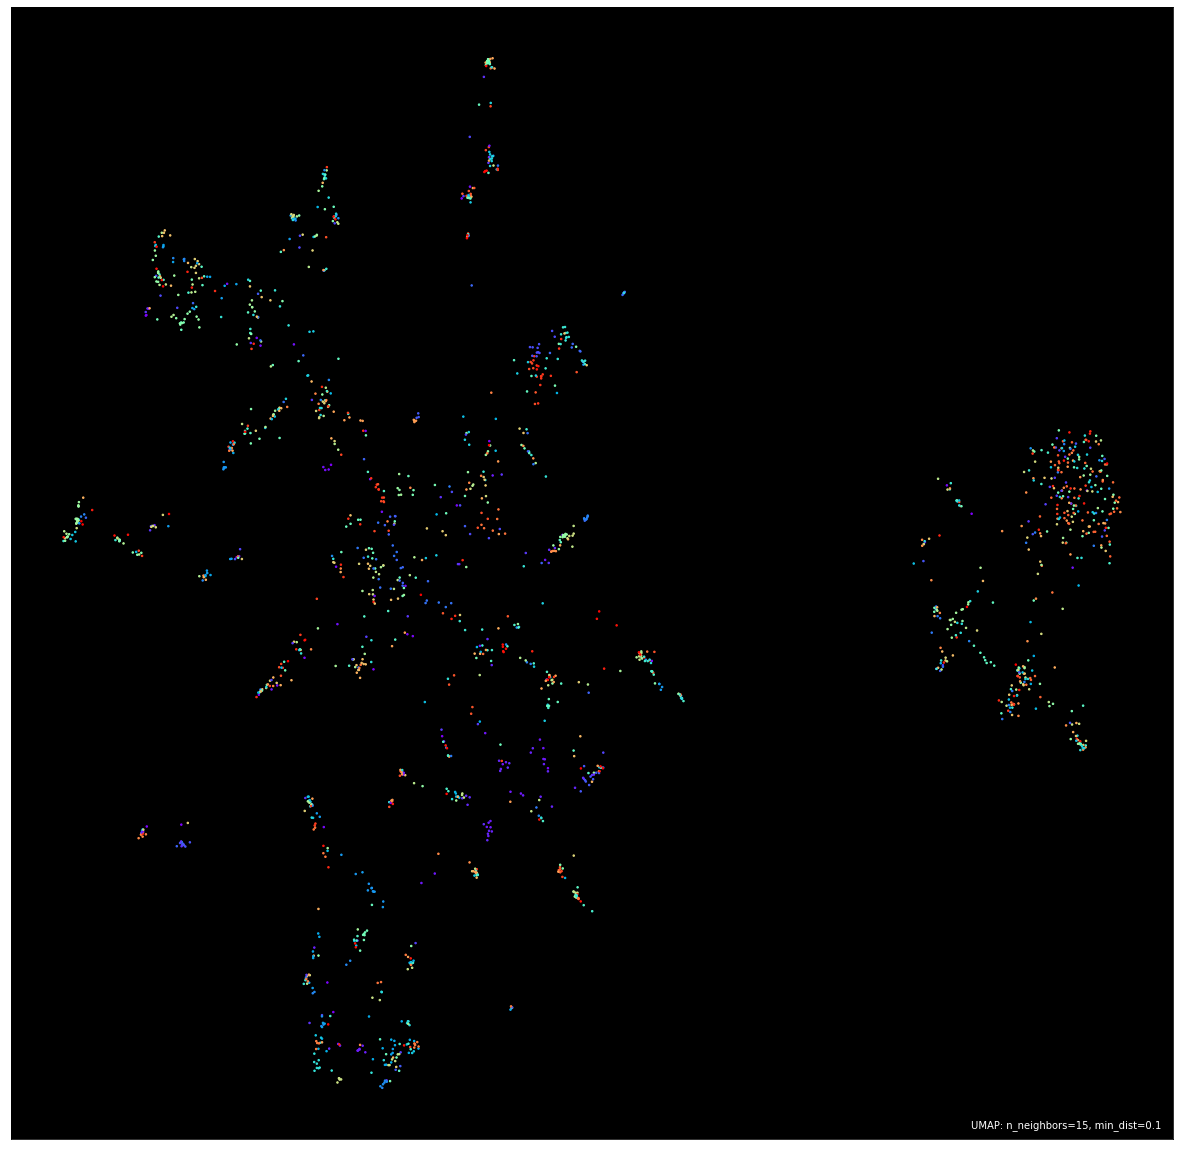

<Figure size 1500x1500 with 1 Axes>

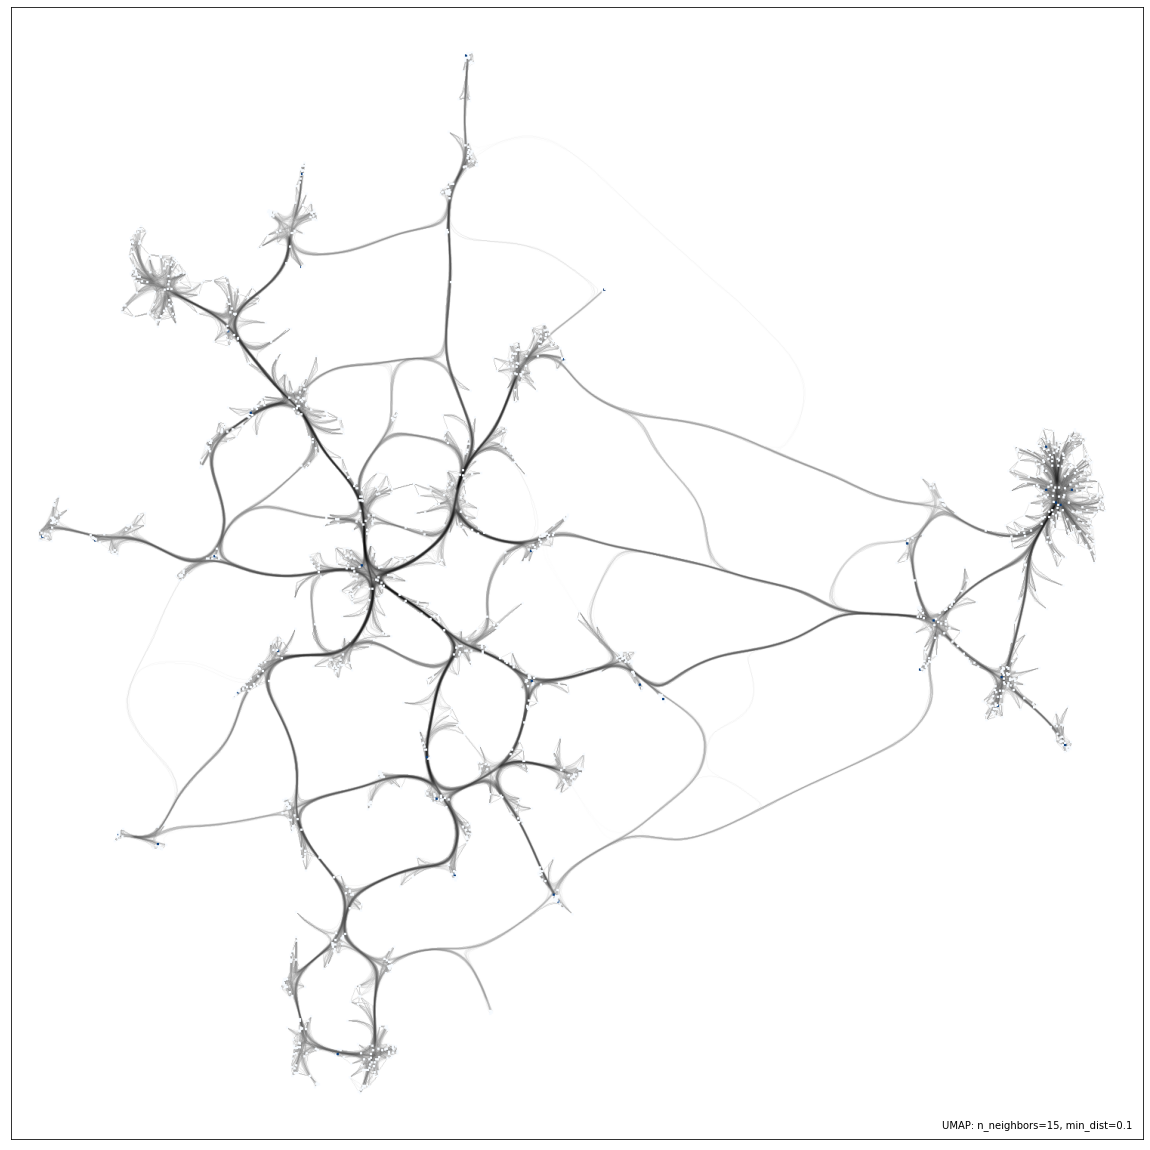

In [16]:
title_embeddindgs  = sentence_encoder(dataset['title'])

ml.UMAP(title_embeddindgs) \
    .plot_clusters(labels=dataset['title']) \
    .plot_connectivity()